#  __Predict Customer Personality to Boost Marketing Campaign__

https://github.com/dikaaka/Predict-Customer-Personality-to-Boost-Marketing-Campaign-by-Using-Machine-Learning/blob/main/DikaKencanaPutera_Predict%20Customer%20Personality%20to%20Boost%20Marketing%20Campaign%20by%20Using%20Machine%20Learning.ipynb

In [5]:
# Import Necessary Libraries and Dataset
# import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
# warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")

In [6]:
df= pd.read_csv('marketing_campaign_data.csv')

In [7]:
df.head()

Unnamed: 0    ID  Year_Birth Education Marital_Status      Income  Kidhome  \
0           0  5524        1957        S1         Lajang  58138000.0        0   
1           1  2174        1954        S1         Lajang  46344000.0        1   
2           2  4141        1965        S1    Bertunangan  71613000.0        0   
3           3  6182        1984        S1    Bertunangan  26646000.0        1   
4           4  5324        1981        S3        Menikah  58293000.0        1   

   Teenhome Dt_Customer  Recency  ...  NumWebVisitsMonth  AcceptedCmp3  \
0         0  04-09-2012       58  ...                  7             0   
1         1  08-03-2014       38  ...                  5             0   
2         0  21-08-2013       26  ...                  4             0   
3         0  10-02-2014       26  ...                  6             0   
4         0  19-01-2014       94  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 30 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [9]:
# melihat kategori pada data bertipe object
print("Total kategori Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total kategori Education:\n", df["Education"].value_counts())

Total kategori Marital_Status:
 Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64 

Total kategori Education:
 S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64


##### Conversion Rate

In [10]:
ConR = round(df['Response'].sum()/df['NumWebVisitsMonth'].sum()*100,2)
print("Jadi, Conversion Rate perusahaan adalah",ConR,"%")

Jadi, Conversion Rate perusahaan adalah 2.8 %


In [11]:
#create conversion rate feature
def safe_div(x,y):
    if y == 0:
        return 0
    return x / y
df['cvr'] = df.apply(lambda x: safe_div(x['Response'],x['NumWebVisitsMonth']), axis=1)

## DATA CLEANING

In [12]:
# drop kolom Unnamed 0
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
# drop kolom ID
df.drop(['ID'], axis=1, inplace=True)

In [14]:
# Drop Missing Value
df = df.dropna()
df

Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0           1957        S1         Lajang  58138000.0        0         0   
1           1954        S1         Lajang  46344000.0        1         1   
2           1965        S1    Bertunangan  71613000.0        0         0   
3           1984        S1    Bertunangan  26646000.0        1         0   
4           1981        S3        Menikah  58293000.0        1         0   
...          ...       ...            ...         ...      ...       ...   
2235        1967        S1        Menikah  61223000.0        0         1   
2236        1946        S3    Bertunangan  64014000.0        2         1   
2237        1981        S1          Cerai  56981000.0        0         0   
2238        1956        S2    Bertunangan  69245000.0        0         1   
2239        1954        S3        Menikah  52869000.0        1         1   

     Dt_Customer  Recency  MntCoke  MntFruits  ...  AcceptedCmp3  \
0     04-09-2012       58   635000      88000  ...             0   
1     08-03-2014       38    11000       1000  ...             0   
2     21-08-2013       26   426000      49000  ...             0   
3     10-02-2014       26    11000       4000  ...             0   
4     19-01-2014       94   173000      43000  ...             0   
...          ...      ...      ...        ...  ...           ...   
2235  13-06-2013       46   709000      43000  ...             0   
2236  10-06-2014       56   406000          0  ...             0   
2237  25-01-2014       91   908000      48000  ...             0   
2238  24-01-2014        8   428000      30000  ...             0   
2239  15-10-2012       40    84000       3000  ...             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response       cvr  
0                 3         11         1  0.142857  
1                 3         11         0  0.000000  
2                 3         11         0  0.000000  
3                 3         11         0  0.000000  
4                 3         11         0  0.000000  
...             ...        ...       ...       ...  
2235              3         11         0  0.000000  
2236              3         11         0  0.000000  
2237              3         11         0  0.000000  
2238              3         11         0  0.000000  
2239              3         11         1  0.142857  

[2216 rows x 29 columns]

## DATA ENGINEERING

In [15]:
# merubah Dt_Customer dtype dari object to datetime 64[ns]
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\253874905.py:2: UserWarning:

Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\253874905.py:2: UserWarning:

Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\253874905.py:2: UserWarning:

Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\253874905.py:2: UserWarning:

Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\253874905.py:2: UserWarning:

Parsing '15-11-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.



In [16]:
# Membuat kolom `Umur`
df['Umur'] = 2023-df['Year_Birth']

In [17]:
# Membuat kolom 'Pengeluaran'
df['Pengeluaran'] = df["MntCoke"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [18]:
# Membuat kolom 'Anak'
df['Anak'] = df['Kidhome'] + df['Teenhome']

In [19]:
# Membuat kolom 'OrangTua'
df['OrangTua'] = np.where(df.Anak>0,1,0)

In [20]:
# Membuat kolom 'TinggalBersama'
df['TinggalBersama'] = df['Marital_Status'].replace({'Menikah':'Bersama', 'Bertunangan':'Sendiri', 'Lajang':'Sendiri', 'Cerai':'Sendiri', 'Janda':'Sendiri', 'Duda':'Sendiri'})

In [21]:
# Membuat kolom "Tot_Acc_Iklan"
df['To_Acc_Iklan'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp5']+df['AcceptedCmp5']

In [22]:
# Membuat Kolom "Jml_Pembelian"
df['Jml_Pembelian'] = df['NumDealsPurchases']+df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

In [23]:
from datetime import date

In [24]:
#create total of days joined
df['Dt_Collected'] = date.today()
df['Dt_Collected'] = df['Dt_Collected'].astype('datetime64[ns]')
df['Dt_Days_Customer'] = df['Dt_Collected'] - df['Dt_Customer']
df['Dt_Days_Customer'] = df['Dt_Days_Customer'].dt.days

In [25]:
df.head()

Year_Birth Education Marital_Status      Income  Kidhome  Teenhome  \
0        1957        S1         Lajang  58138000.0        0         0   
1        1954        S1         Lajang  46344000.0        1         1   
2        1965        S1    Bertunangan  71613000.0        0         0   
3        1984        S1    Bertunangan  26646000.0        1         0   
4        1981        S3        Menikah  58293000.0        1         0   

  Dt_Customer  Recency  MntCoke  MntFruits  ...       cvr  Umur  Pengeluaran  \
0  2012-04-09       58   635000      88000  ...  0.142857    66      1617000   
1  2014-08-03       38    11000       1000  ...  0.000000    69        27000   
2  2013-08-21       26   426000      49000  ...  0.000000    58       776000   
3  2014-10-02       26    11000       4000  ...  0.000000    39        53000   
4  2014-01-19       94   173000      43000  ...  0.000000    42       422000   

   Anak  OrangTua  TinggalBersama  To_Acc_Iklan  Jml_Pembelian  Dt_Collected  \
0     0         0         Sendiri             0             25    2023-03-26   
1     2         1         Sendiri             0              6    2023-03-26   
2     0         0         Sendiri             0             21    2023-03-26   
3     1         1         Sendiri             0              8    2023-03-26   
4     1         1         Bersama             0             19    2023-03-26   

   Dt_Days_Customer  
0              4003  
1              3157  
2              3504  
3              3097  
4              3353  

[5 rows x 38 columns]

In [26]:
df['Umur'].describe()

count    2216.000000
mean       54.179603
std        11.985554
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Umur, dtype: float64

PENENTUAN KELOMPOK USIA:
- `Dewasa Awal` : < 35 tahun
- `Dewasa Akhir`: 35-45 tahun
- `Lansia Awal `: 45-55 tahun
- `Lansia Akhir`: 55-65 tahun
- `Manula` : > 65 tahun

In [27]:
# Membuat kolom kelompok umur
df['KelompokUsia'] = np.where(df['Umur']<35, 'Dewasa Awal', 
                              np.where(df['Umur']<44, 'Dewasa Akhir', 
                                       np.where(df['Umur']<54, 'Lansia Awal', 
                                                np.where(df['Umur']<64, 'Lansia Akhir',
                                                         np.where(df['Umur']<74, 'Manula', 
                                                         'Usia Tua' )))))

In [28]:
df['KelompokUsia'].value_counts()

Lansia Awal     733
Lansia Akhir    502
Manula          453
Dewasa Akhir    329
Usia Tua        109
Dewasa Awal      90
Name: KelompokUsia, dtype: int64

<module 'seaborn' from 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python39\\site-packages\\seaborn\\__init__.py'>

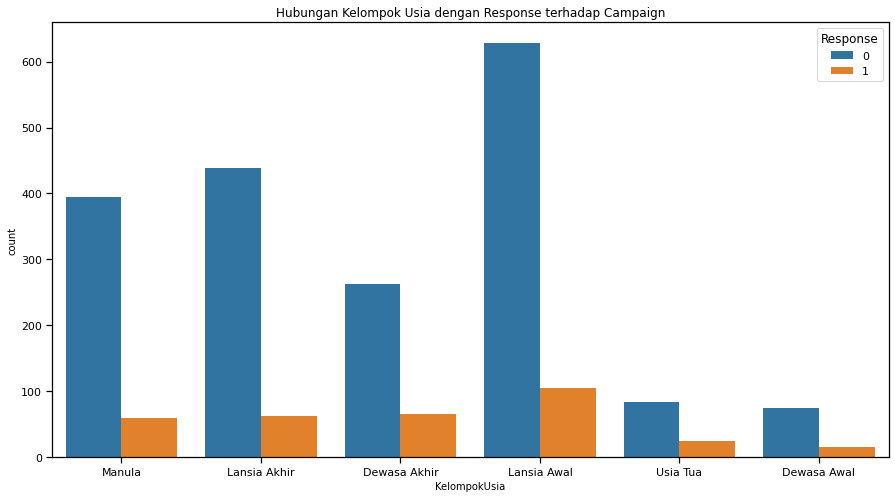

In [29]:
plt.figure(figsize= (15,8))
sns.countplot(x='KelompokUsia', hue='Response', data=df)
plt.title('Hubungan Kelompok Usia dengan Response terhadap Campaign')
sns

berdasarkan jumah, kelompok Usia `Lansia Awal(45-55 tahun)` cenderung lebih besar merespon terhadap campaign yang diberikan. Ini bisa menjadi tanda bahwa campaign akan lebih efektif ketika diberikan kepada kelompok usia ini, dengan response yang lebih banyak daripada kelompok usia lainnya, kita bisa memaksimalkan campaign ke dalam kelompok ini supaya mendapat respon positif yang lebih banyak. selain itu, kita akan melihat faktor apa saja yang menjadikan kelompok usia ini untuk merespon campaign yang kita berikan 

In [30]:
# FUNGTION TABLE PERCENTAGE
import pandas as pd
import seaborn as sns

def plotting_percentages(df, col, target):
    x, y = col, target
    
    # Temporary dataframe with percentage values
    temp_df = df.groupby(x)[y].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('percent').reset_index()

    # Sort the column values for plotting    
    order_list = list(df[col].unique())
    order_list.sort()

    # Plot the figure
    sns.set(font_scale=1.5)
    g = sns.catplot(x=x, y='percent', hue=y,kind='bar', data=temp_df, 
                    height=8, aspect=2, order=order_list, legend_out=False)
    g.ax.set_ylim(0,100)

    # Loop through each bar in the graph and add the percentage value    
    for p in g.ax.patches:
        txt = str(p.get_height().round(1)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
        
    # Set labels and title
    plt.title(f'{col.title()} By Percent {target.title()}', 
              fontdict={'fontsize': 30})
    plt.xlabel(f'{col.title()}', fontdict={'fontsize': 20})
    plt.ylabel(f'{target.title()} Percentage', fontdict={'fontsize': 20})
    plt.xticks(rotation=75)
    return g

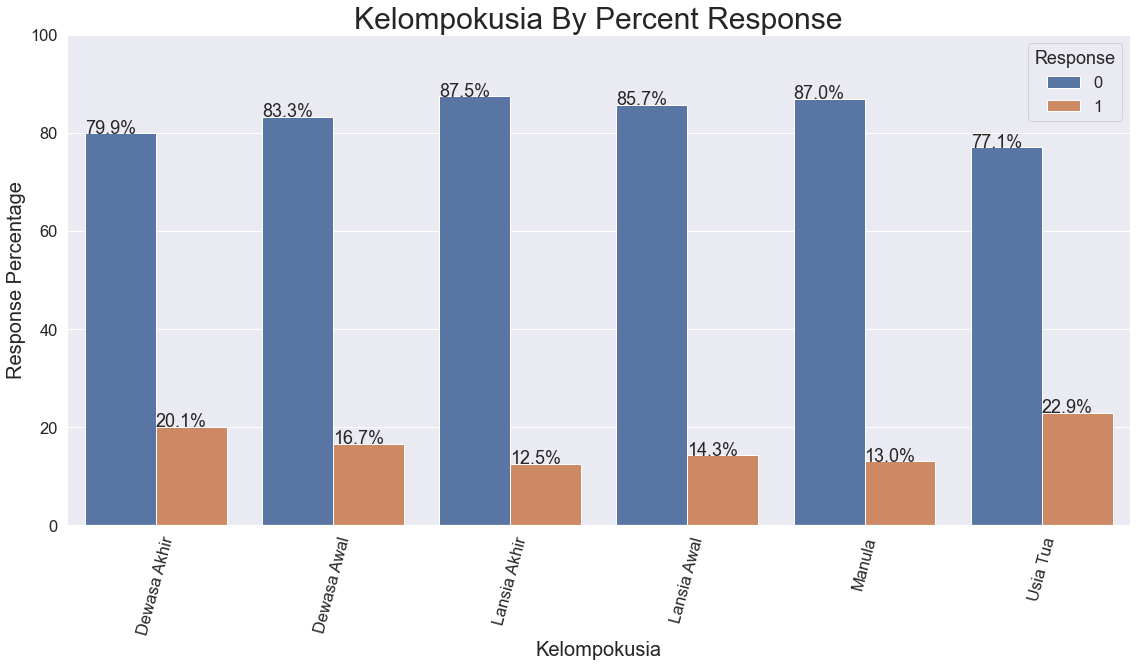

In [31]:
plotting_percentages(df=df, col='KelompokUsia', target='Response' )

kelompok usia `Lansia Akhir`(55-65 tahun) dan `Manula`(>65 tahun) cenderung paling sedikit untuk merespon campaign yang kita berikan, dengan demikian kita dapat mengetahui lebih lanjut faktor yang membuat kelompok ini cenderung untuk tidak merespon campaign yang kita berikan

### EDA

In [32]:
df_eda = df.copy()

In [33]:
#looping to categorize cat include categorical columns and num include numeric columns
cat = []
num = []
dat = []
for col in df_eda.columns: 
    if df_eda[col].dtype == 'O':
        cat.append(col)
    elif df_eda[col].dtype == 'int64' or df_eda[col].dtype == 'float64':
        num.append(col)
    else:
        dat.append(col)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\3384437450.py:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\3384437450.py:4: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



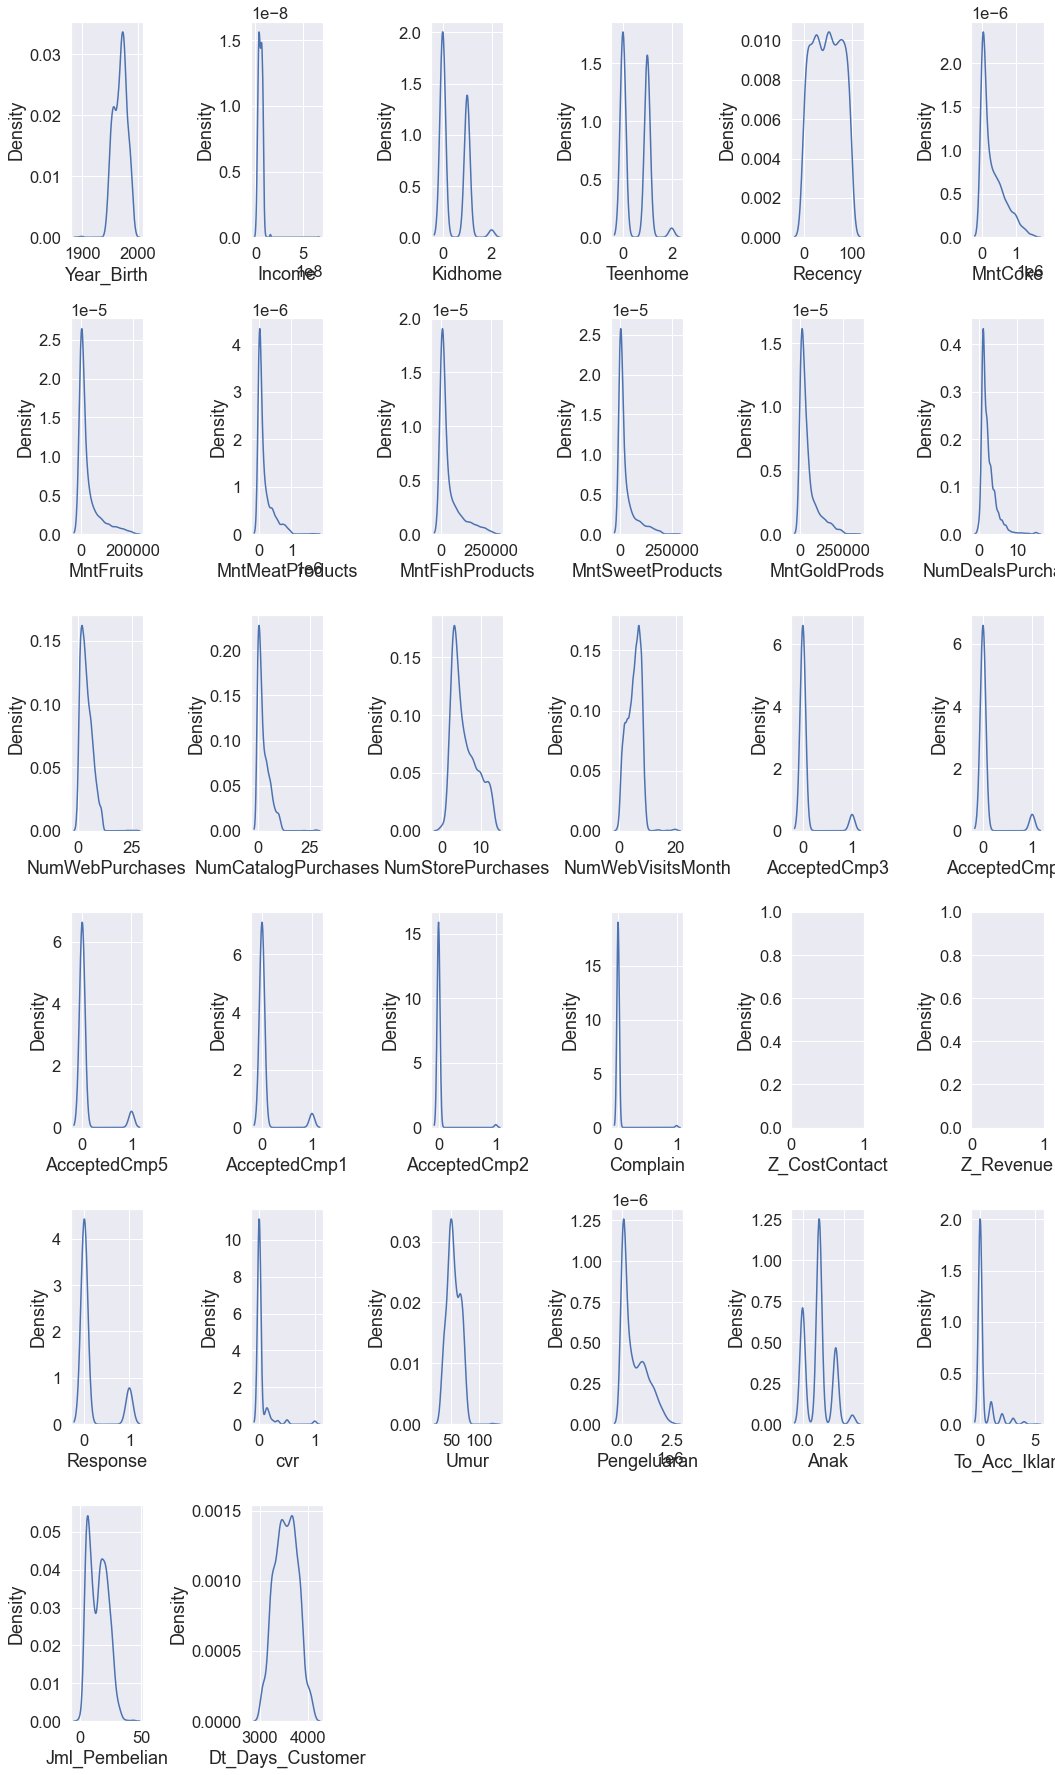

In [34]:
plt.figure(figsize= (15, 25))
for i in range(len(num)):
    plt.subplot(6, 6, i+1)
    sns.kdeplot(x = df_eda[num[i]])
    plt.tight_layout()

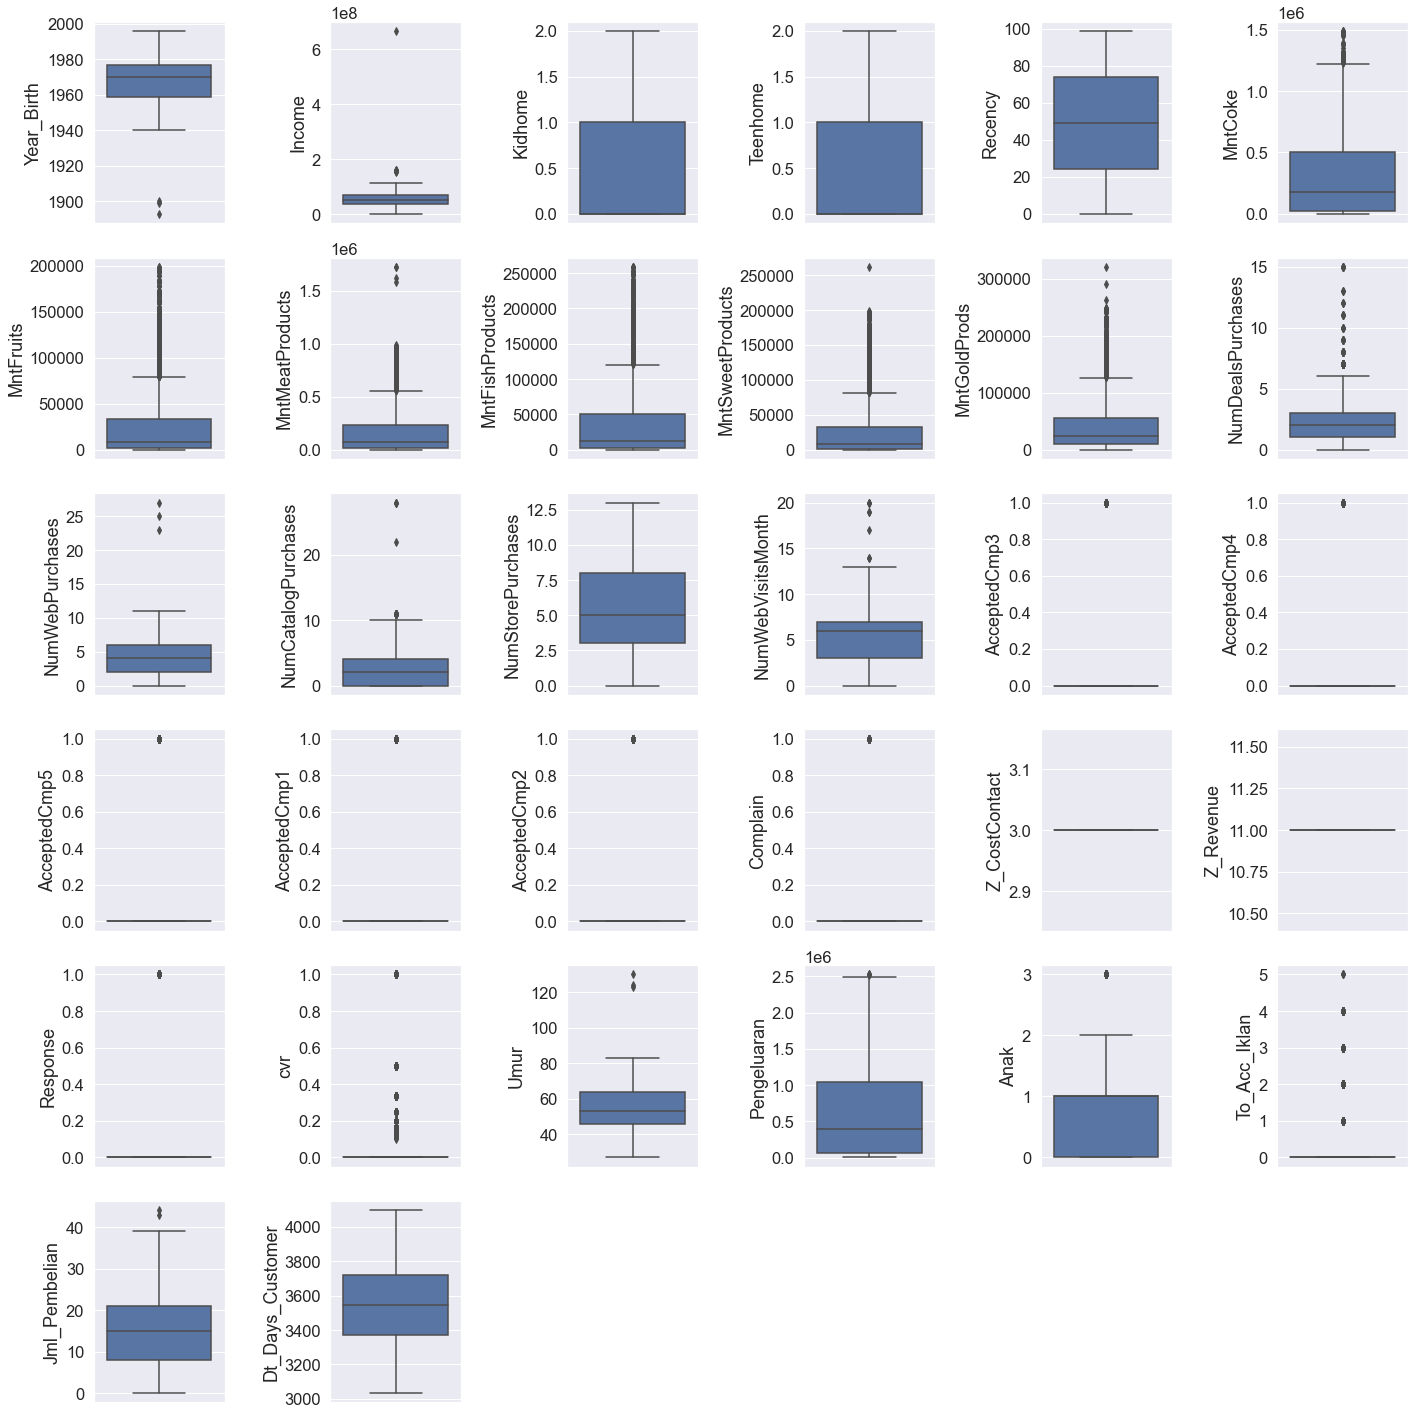

In [35]:
plt.figure(figsize= (20,20))
for i in range(len(num)):
    plt.subplot(6, 6, i+1)
    sns.boxplot(y = df_eda[num[i]], orient='v')
    plt.tight_layout()

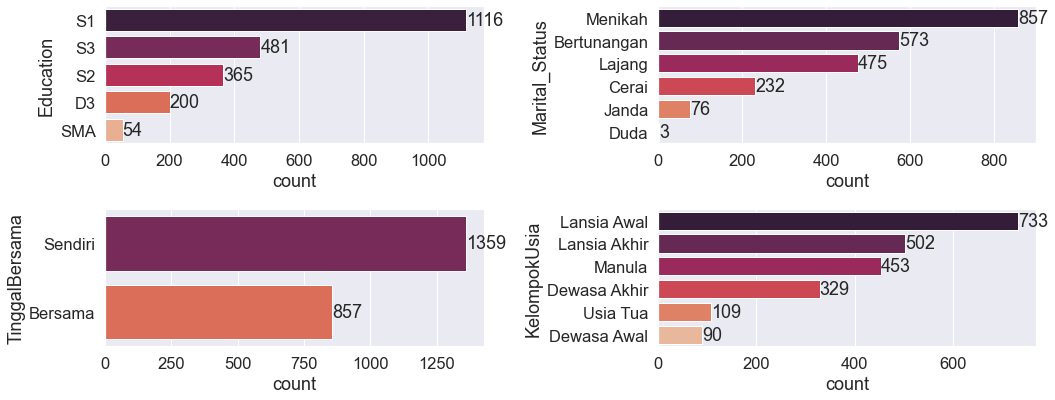

In [36]:
plt.figure(figsize=(15, 25))
for i in range(len(cat)):
    plt.subplot(9, 2, i+1)
    ax = sns.countplot(y=cat[i], data=df_eda, palette='rocket', order=df_eda[cat[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

<Axes: >

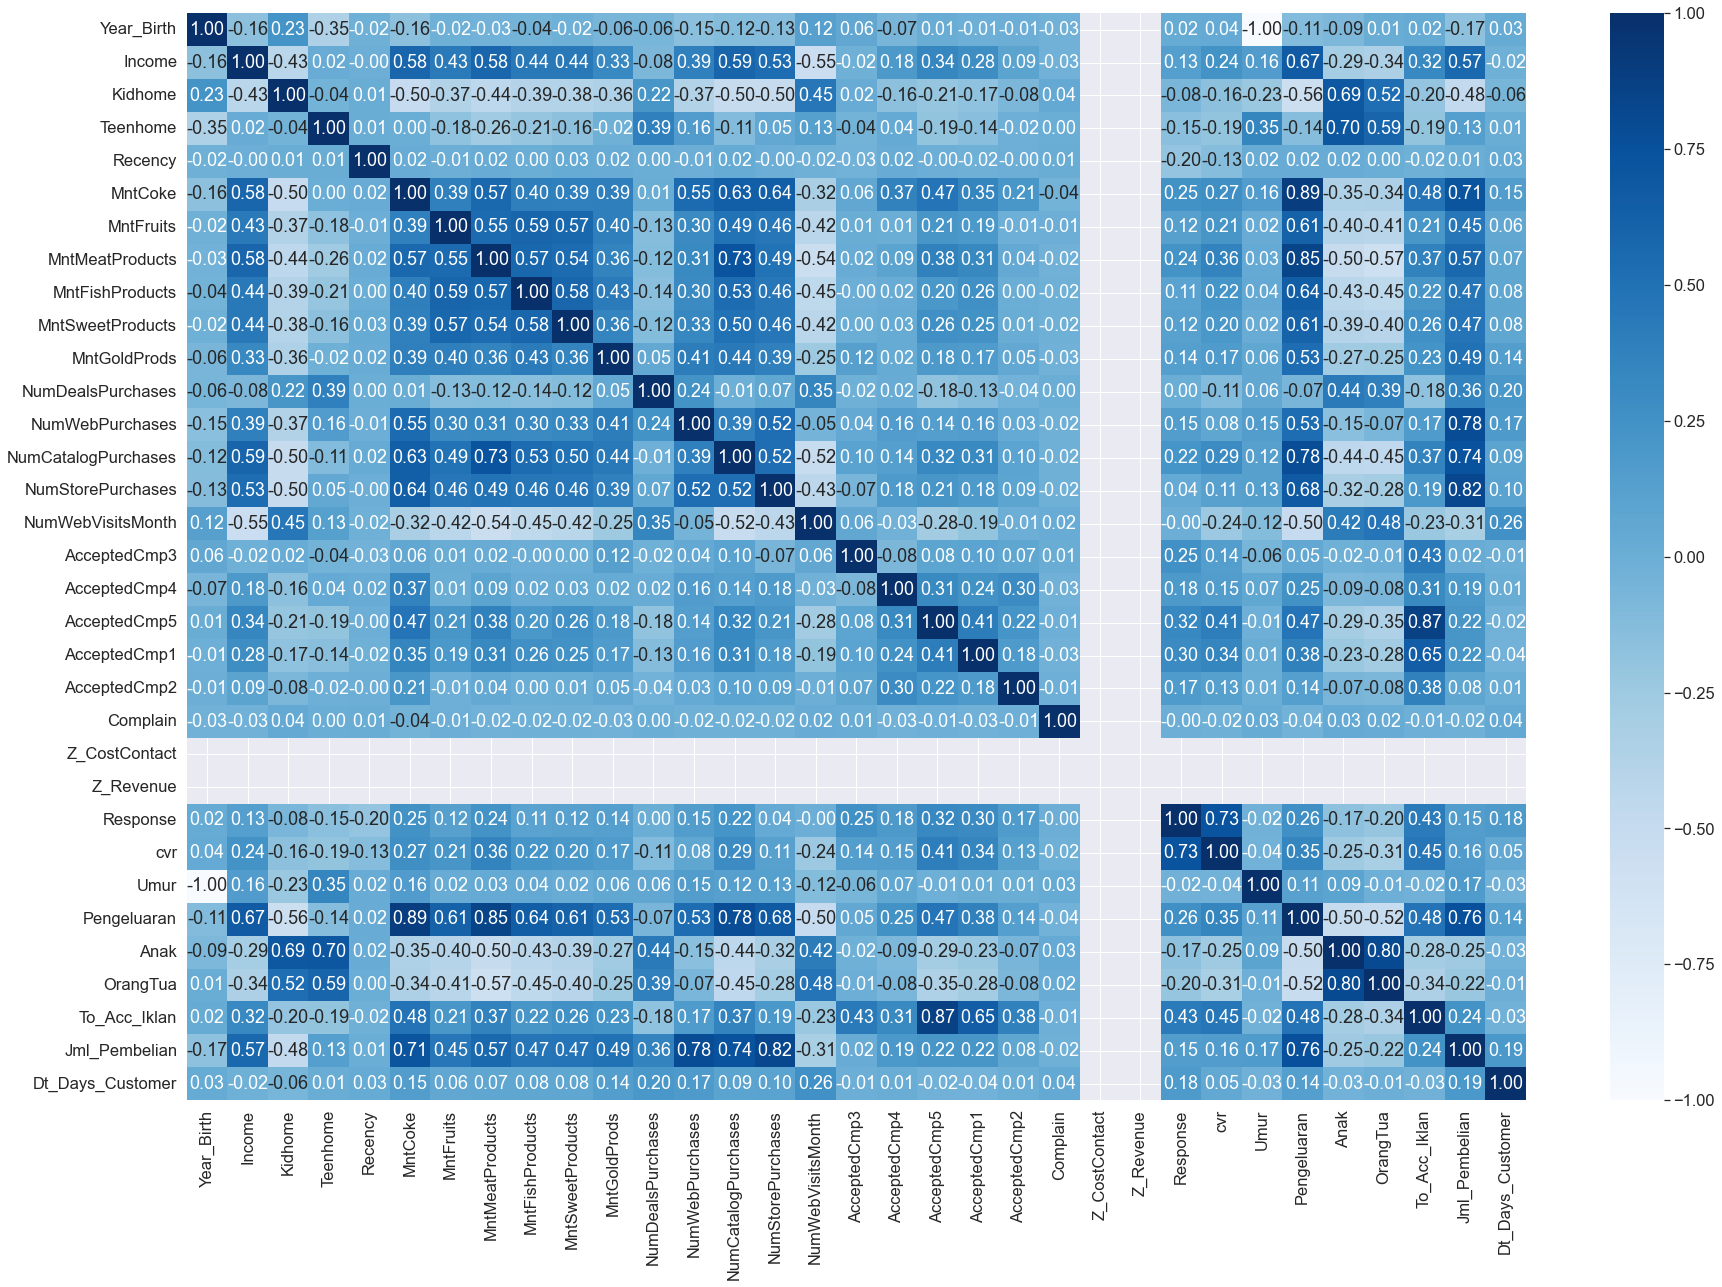

In [37]:
plt.figure(figsize= (30,20))
sns.heatmap(df_eda.corr(),cmap='Blues', annot=True, fmt='.2f')

In [38]:
df_task1 = df_eda.groupby('KelompokUsia').agg({'cvr':'sum'}).reset_index()
df_task1['sum_cvr'] = df_task1['cvr'].sum()
df_task1['pct'] = round((df_task1['cvr']/df_task1['sum_cvr'])*100, 2)
df_task1

KelompokUsia        cvr    sum_cvr    pct
0  Dewasa Akhir  23.110317  96.375794  23.98
1   Dewasa Awal   6.781746  96.375794   7.04
2  Lansia Akhir  14.800794  96.375794  15.36
3   Lansia Awal  25.740873  96.375794  26.71
4        Manula  17.590873  96.375794  18.25
5      Usia Tua   8.351190  96.375794   8.67

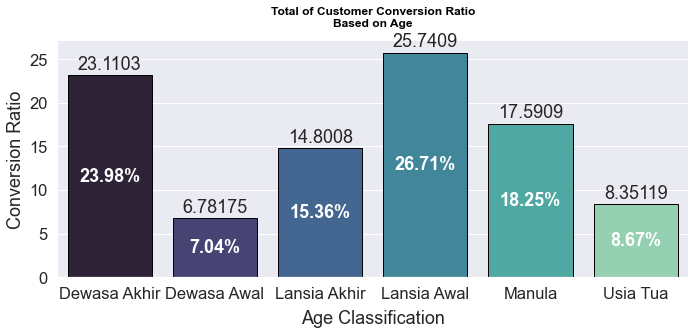

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Total of Customer Conversion Ratio\nBased on Age", fontsize=12, color='black', weight='bold', pad=15)
sns.barplot(x='KelompokUsia', y='cvr', data=df_task1, edgecolor='black', palette='mako')

plt.ylabel('Conversion Ratio')
plt.xlabel('Age Classification', labelpad=8)
#plt.xticks(np.arange(3), ['Adult\n(25-44 years old)', 'Middle Aged\n(45-64 years old)', 'Senior Citizen\n(>64 years old)'])

plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['23.98%', '7.04%', '15.36%', '26.71%','18.25%','8.67%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()
plt.savefig('customer_cvr.png')

(0.0, 85.0)

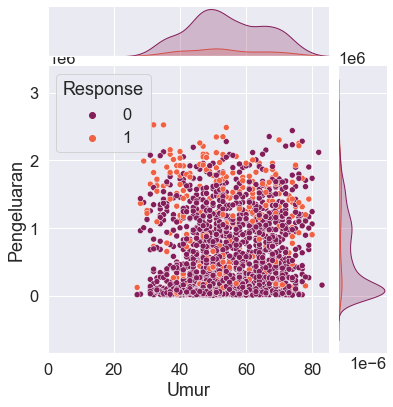

In [40]:
plot= sns.jointplot(x='Umur',y='Pengeluaran', data=df, hue="Response", palette='rocket')
plot.ax_marg_x.set_xlim(0, 85)

(0.0, 120000000.0)

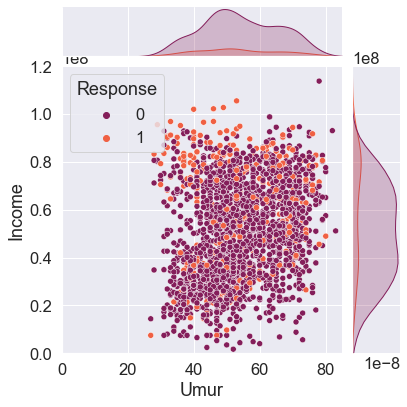

In [41]:
plot= sns.jointplot(x='Umur',y='Income', data=df, hue="Response", palette='rocket')
plot.ax_marg_x.set_xlim(0, 85)
plot.ax_marg_y.set_ylim(0, 120000000)

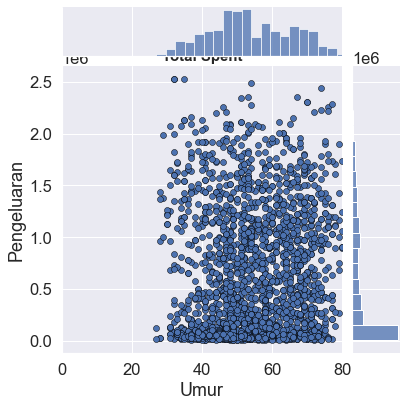

In [42]:
plot = sns.jointplot(x=df_eda['Umur'], y=df_eda['Pengeluaran'], edgecolor='black')
plt.title('Age\nvs.\nTotal Spent', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 80)
plt.savefig('age_totspent_jointplot.png')
plt.show()

### DATA CLEANING

### MISSING VALUE

In [43]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
cvr                    0
Umur                   0
Pengeluaran            0
Anak                   0
OrangTua               0
TinggalBersama         0
To_Acc_Iklan           0
Jml_Pembelian          0
Dt_Collected           0
Dt_Days_Customer       0
KelompokUsia           0
dtype: int64

tidak terdapat missing value pada dataset

### Duplicated data

In [44]:
df.duplicated().sum()

183

In [45]:
df.drop_duplicates(keep='first')

Year_Birth Education Marital_Status       Income  Kidhome  Teenhome  \
0           1957        S1         Lajang   58138000.0        0         0   
1           1954        S1         Lajang   46344000.0        1         1   
2           1965        S1    Bertunangan   71613000.0        0         0   
3           1984        S1    Bertunangan   26646000.0        1         0   
4           1981        S3        Menikah   58293000.0        1         0   
...          ...       ...            ...          ...      ...       ...   
2233        1977        S1    Bertunangan  666666000.0        1         0   
2235        1967        S1        Menikah   61223000.0        0         1   
2237        1981        S1          Cerai   56981000.0        0         0   
2238        1956        S2    Bertunangan   69245000.0        0         1   
2239        1954        S3        Menikah   52869000.0        1         1   

     Dt_Customer  Recency  MntCoke  MntFruits  ...  Umur  Pengeluaran  Anak  \
0     2012-04-09       58   635000      88000  ...    66      1617000     0   
1     2014-08-03       38    11000       1000  ...    69        27000     2   
2     2013-08-21       26   426000      49000  ...    58       776000     0   
3     2014-10-02       26    11000       4000  ...    39        53000     1   
4     2014-01-19       94   173000      43000  ...    42       422000     1   
...          ...      ...      ...        ...  ...   ...          ...   ...   
2233  2013-02-06       23     9000      14000  ...    46        62000     1   
2235  2013-06-13       46   709000      43000  ...    56      1341000     1   
2237  2014-01-25       91   908000      48000  ...    42      1241000     0   
2238  2014-01-24        8   428000      30000  ...    67       843000     1   
2239  2012-10-15       40    84000       3000  ...    69       172000     2   

      OrangTua  TinggalBersama  To_Acc_Iklan  Jml_Pembelian  Dt_Collected  \
0            0         Sendiri             0             25    2023-03-26   
1            1         Sendiri             0              6    2023-03-26   
2            0         Sendiri             0             21    2023-03-26   
3            1         Sendiri             0              8    2023-03-26   
4            1         Bersama             0             19    2023-03-26   
...        ...             ...           ...            ...           ...   
2233         1         Sendiri             0             11    2023-03-26   
2235         1         Bersama             0             18    2023-03-26   
2237         0         Sendiri             0             19    2023-03-26   
2238         1         Sendiri             0             23    2023-03-26   
2239         1         Bersama             0             11    2023-03-26   

      Dt_Days_Customer  KelompokUsia  
0                 4003        Manula  
1                 3157        Manula  
2                 3504  Lansia Akhir  
3                 3097  Dewasa Akhir  
4                 3353  Dewasa Akhir  
...                ...           ...  
2233              3700   Lansia Awal  
2235              3573  Lansia Akhir  
2237              3347  Dewasa Akhir  
2238              3348        Manula  
2239              3814        Manula  

[2033 rows x 39 columns]

### Drop Feature yang Redundant

In [46]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth"]
df.drop(to_drop, axis=1, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Education            2216 non-null   object        
 1   Income               2216 non-null   float64       
 2   Kidhome              2216 non-null   int64         
 3   Teenhome             2216 non-null   int64         
 4   Recency              2216 non-null   int64         
 5   MntCoke              2216 non-null   int64         
 6   MntFruits            2216 non-null   int64         
 7   MntMeatProducts      2216 non-null   int64         
 8   MntFishProducts      2216 non-null   int64         
 9   MntSweetProducts     2216 non-null   int64         
 10  MntGoldProds         2216 non-null   int64         
 11  NumDealsPurchases    2216 non-null   int64         
 12  NumWebPurchases      2216 non-null   int64         
 13  NumCatalogPurchases  2216 non-nul

In [48]:
df.describe()

Income      Kidhome     Teenhome      Recency       MntCoke  \
count  2.216000e+03  2216.000000  2216.000000  2216.000000  2.216000e+03   
mean   5.224725e+07     0.441787     0.505415    49.012635  3.050916e+05   
std    2.517308e+07     0.536896     0.544181    28.948352  3.373279e+05   
min    1.730000e+06     0.000000     0.000000     0.000000  0.000000e+00   
25%    3.530300e+07     0.000000     0.000000    24.000000  2.400000e+04   
50%    5.138150e+07     0.000000     0.000000    49.000000  1.745000e+05   
75%    6.852200e+07     1.000000     1.000000    74.000000  5.050000e+05   
max    6.666660e+08     2.000000     2.000000    99.000000  1.493000e+06   

           MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count    2216.000000     2.216000e+03      2216.000000       2216.000000   
mean    26356.046931     1.669959e+05     37637.635379      27028.880866   
std     39793.916518     2.242833e+05     54752.082415      41072.045667   
min         0.000000     0.000000e+00         0.000000          0.000000   
25%      2000.000000     1.600000e+04      3000.000000       1000.000000   
50%      8000.000000     6.800000e+04     12000.000000       8000.000000   
75%     33000.000000     2.322500e+05     50000.000000      33000.000000   
max    199000.000000     1.725000e+06    259000.000000     262000.000000   

        MntGoldProds  ...     Complain     Response          cvr         Umur  \
count    2216.000000  ...  2216.000000  2216.000000  2216.000000  2216.000000   
mean    43965.252708  ...     0.009477     0.150271     0.043491    54.179603   
std     51815.414374  ...     0.096907     0.357417     0.141916    11.985554   
min         0.000000  ...     0.000000     0.000000     0.000000    27.000000   
25%      9000.000000  ...     0.000000     0.000000     0.000000    46.000000   
50%     24500.000000  ...     0.000000     0.000000     0.000000    53.000000   
75%     56000.000000  ...     0.000000     0.000000     0.000000    64.000000   
max    321000.000000  ...     1.000000     1.000000     1.000000   130.000000   

        Pengeluaran         Anak     OrangTua  To_Acc_Iklan  Jml_Pembelian  \
count  2.216000e+03  2216.000000  2216.000000   2216.000000    2216.000000   
mean   6.070754e+05     0.947202     0.714350      0.297383      14.880866   
std    6.029005e+05     0.749062     0.451825      0.769340       7.670957   
min    5.000000e+03     0.000000     0.000000      0.000000       0.000000   
25%    6.900000e+04     0.000000     0.000000      0.000000       8.000000   
50%    3.965000e+05     1.000000     1.000000      0.000000      15.000000   
75%    1.048000e+06     1.000000     1.000000      0.000000      21.000000   
max    2.525000e+06     3.000000     1.000000      5.000000      44.000000   

       Dt_Days_Customer  
count       2216.000000  
mean        3544.006318  
std          232.469034  
min         3032.000000  
25%         3372.000000  
50%         3545.000000  
75%         3718.000000  
max         4095.000000  

[8 rows x 30 columns]

#### One Hot Encoding untuk categorical Feature

In [49]:
categorical_cols = [col for col in df.select_dtypes(include='object').columns.tolist()]

In [50]:
onehot = pd.get_dummies(df[categorical_cols], drop_first=True)

In [51]:
onehot.head()

Education_S1  Education_S2  Education_S3  Education_SMA  \
0             1             0             0              0   
1             1             0             0              0   
2             1             0             0              0   
3             1             0             0              0   
4             0             0             1              0   

   TinggalBersama_Sendiri  KelompokUsia_Dewasa Awal  \
0                       1                         0   
1                       1                         0   
2                       1                         0   
3                       1                         0   
4                       0                         0   

   KelompokUsia_Lansia Akhir  KelompokUsia_Lansia Awal  KelompokUsia_Manula  \
0                          0                         0                    1   
1                          0                         0                    1   
2                          1                         0                    0   
3                          0                         0                    0   
4                          0                         0                    0   

   KelompokUsia_Usia Tua  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

#### Standardization

In [52]:
numerical_cols = [col for col in df.select_dtypes(include='int').columns.tolist()]

In [53]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(df[numerical_cols]), columns=numerical_cols)

In [54]:
std.head()

Kidhome  Teenhome   Recency   MntCoke  MntFruits  MntMeatProducts  \
0 -0.823039 -0.928972  0.310532  0.978226   1.549429         1.690227   
1  1.039938  0.909066 -0.380509 -0.872024  -0.637328        -0.717986   
2 -0.823039 -0.928972 -0.795134  0.358511   0.569159        -0.178368   
3  1.039938 -0.928972 -0.795134 -0.872024  -0.561922        -0.655551   
4  1.039938 -0.928972  1.554407 -0.391671   0.418348        -0.218505   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  ...  \
0         2.454568          1.484827      0.850031           0.351713  ...   
1        -0.651038         -0.633880     -0.732867          -0.168231  ...   
2         1.340203         -0.146821     -0.037937          -0.688176  ...   
3        -0.504892         -0.585174     -0.752171          -0.168231  ...   
4         0.152766         -0.000703     -0.559135           1.391603  ...   

   AcceptedCmp2  Complain  Response      Umur  Pengeluaran      Anak  \
0     -0.117148 -0.097812  2.377952  0.986443     1.675488 -1.264803   
1     -0.117148 -0.097812 -0.420530  1.236801    -0.962358  1.405806   
2     -0.117148 -0.097812 -0.420530  0.318822     0.280250 -1.264803   
3     -0.117148 -0.097812 -0.420530 -1.266777    -0.919224  0.070501   
4     -0.117148 -0.097812 -0.420530 -1.016420    -0.307044  0.070501   

   OrangTua  To_Acc_Iklan  Jml_Pembelian  Dt_Days_Customer  
0 -1.581389      -0.38663       1.319446          1.974875  
1  0.632356      -0.38663      -1.157987         -1.665141  
2 -1.581389      -0.38663       0.797881         -0.172132  
3  0.632356      -0.38663      -0.897205         -1.923298  
4  0.632356      -0.38663       0.537099         -0.821827  

[5 rows x 28 columns]

In [55]:
model = pd.concat([onehot, std], axis=1)

In [56]:
model.head()

Education_S1  Education_S2  Education_S3  Education_SMA  \
0           1.0           0.0           0.0            0.0   
1           1.0           0.0           0.0            0.0   
2           1.0           0.0           0.0            0.0   
3           1.0           0.0           0.0            0.0   
4           0.0           0.0           1.0            0.0   

   TinggalBersama_Sendiri  KelompokUsia_Dewasa Awal  \
0                     1.0                       0.0   
1                     1.0                       0.0   
2                     1.0                       0.0   
3                     1.0                       0.0   
4                     0.0                       0.0   

   KelompokUsia_Lansia Akhir  KelompokUsia_Lansia Awal  KelompokUsia_Manula  \
0                        0.0                       0.0                  1.0   
1                        0.0                       0.0                  1.0   
2                        1.0                       0.0                  0.0   
3                        0.0                       0.0                  0.0   
4                        0.0                       0.0                  0.0   

   KelompokUsia_Usia Tua  ...  AcceptedCmp2  Complain  Response      Umur  \
0                    0.0  ...     -0.117148 -0.097812  2.377952  0.986443   
1                    0.0  ...     -0.117148 -0.097812 -0.420530  1.236801   
2                    0.0  ...     -0.117148 -0.097812 -0.420530  0.318822   
3                    0.0  ...     -0.117148 -0.097812 -0.420530 -1.266777   
4                    0.0  ...     -0.117148 -0.097812 -0.420530 -1.016420   

   Pengeluaran      Anak  OrangTua  To_Acc_Iklan  Jml_Pembelian  \
0     1.675488 -1.264803 -1.581389      -0.38663       1.319446   
1    -0.962358  1.405806  0.632356      -0.38663      -1.157987   
2     0.280250 -1.264803 -1.581389      -0.38663       0.797881   
3    -0.919224  0.070501  0.632356      -0.38663      -0.897205   
4    -0.307044  0.070501  0.632356      -0.38663       0.537099   

   Dt_Days_Customer  
0          1.974875  
1         -1.665141  
2         -0.172132  
3         -1.923298  
4         -0.821827  

[5 rows x 38 columns]

## DATA MODELING

In [57]:
# Import Necessery Libraries
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


## Unsupervised Learning

### Dimentional Ruduction

In [58]:
model.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5',
                'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases',
                'MntCoke','MntFishProducts','MntFruits','MntMeatProducts','MntSweetProducts', 'MntGoldProds',
                'Kidhome','Teenhome', 'Response'], inplace=True, axis=1)

In [59]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2084
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education_S1               2216 non-null   float64
 1   Education_S2               2216 non-null   float64
 2   Education_S3               2216 non-null   float64
 3   Education_SMA              2216 non-null   float64
 4   TinggalBersama_Sendiri     2216 non-null   float64
 5   KelompokUsia_Dewasa Awal   2216 non-null   float64
 6   KelompokUsia_Lansia Akhir  2216 non-null   float64
 7   KelompokUsia_Lansia Awal   2216 non-null   float64
 8   KelompokUsia_Manula        2216 non-null   float64
 9   KelompokUsia_Usia Tua      2216 non-null   float64
 10  Recency                    2216 non-null   float64
 11  NumWebVisitsMonth          2216 non-null   float64
 12  Complain                   2216 non-null   float64
 13  Umur                       2216 non-null   float

In [60]:
from dython.nominal import associations

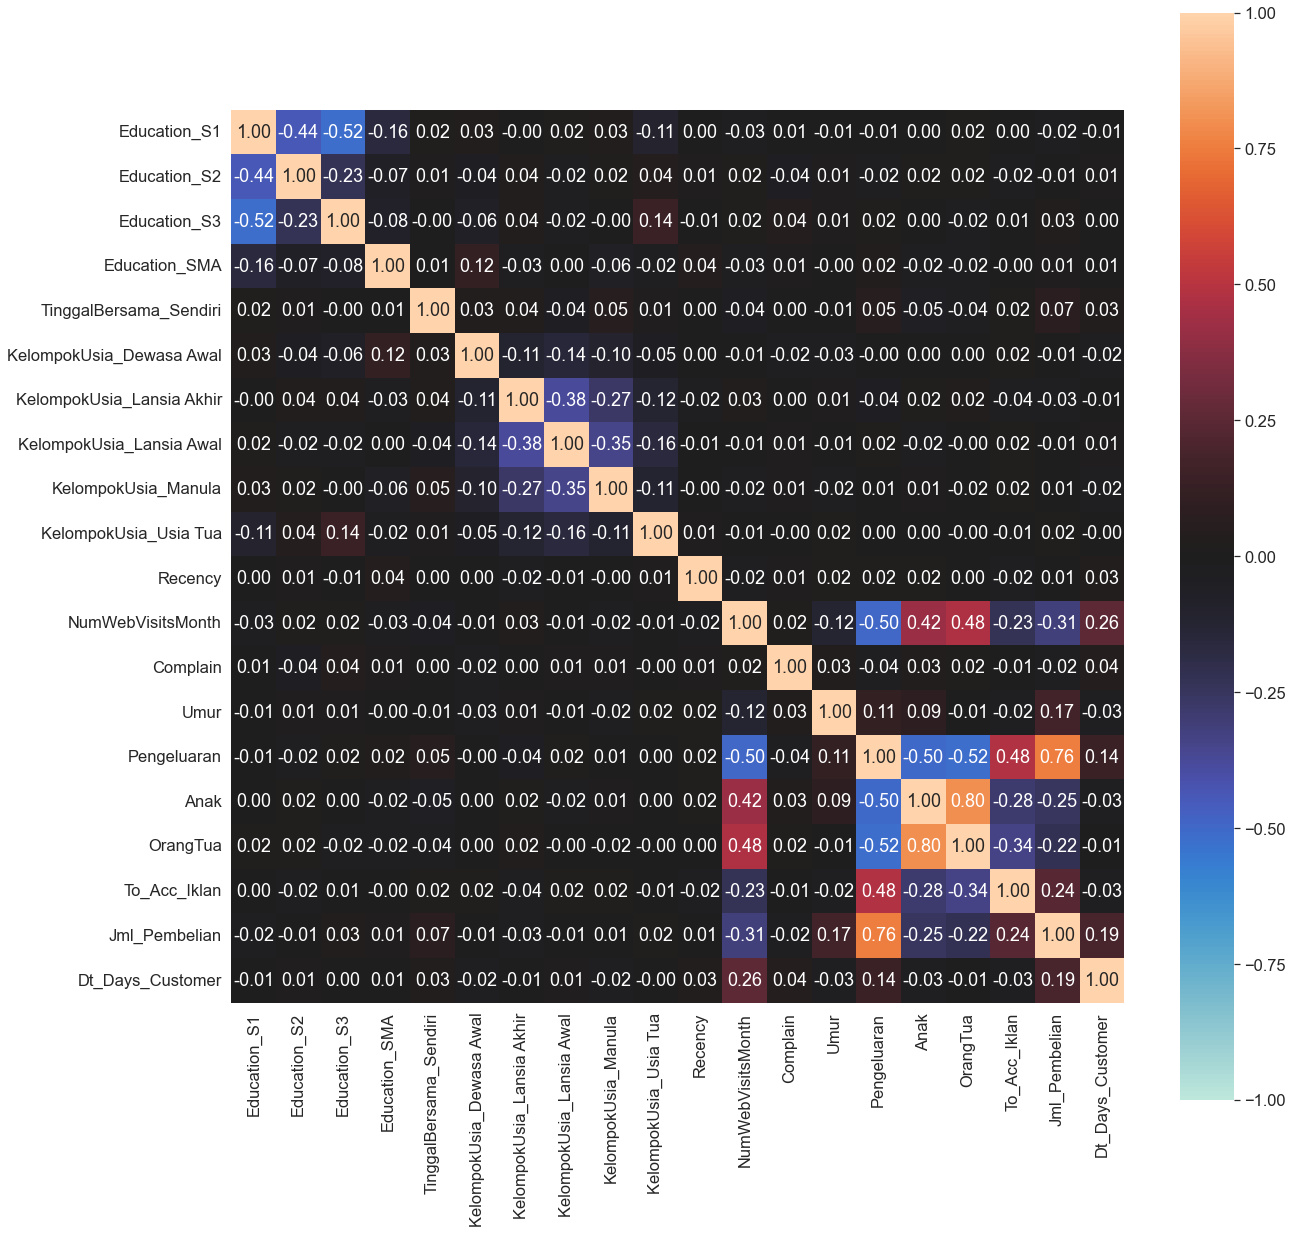

In [61]:
fig, ax = plt.subplots(figsize=(20, 20))
associations(model, ax=ax);

berdasarkan metode RFM (Recency, Frequency and ....) akan dipilih beberapa feature yaitu:
1. R : `Recency`
2. F : `Jml_Pembelian`
3. M : `Pengeluaran`
4. L : `Umur`
5. C : `Dt_Days_Customer`

In [62]:
ModelTrain = model.copy()
ModelTrain = ModelTrain[['Recency', 'Jml_Pembelian', 'Pengeluaran', 'Umur', 'Dt_Days_Customer']]
ModelTrain.columns = ['R', 'F', 'M', 'L', 'C']
ModelTrain.describe(include='all')

R             F             M             L             C
count  2.216000e+03  2.216000e+03  2.216000e+03  2.216000e+03  2.216000e+03
mean  -8.537094e-17 -3.982975e-17  6.115996e-17  9.894186e-17  6.471458e-16
std    1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00  1.000226e+00
min   -1.693488e+00 -1.940335e+00 -9.988568e-01 -2.268209e+00 -2.202968e+00
25%   -8.642385e-01 -8.972048e-01 -8.926794e-01 -6.826092e-01 -7.400777e-01
50%   -4.365786e-04  1.553398e-02 -3.493494e-01 -9.844093e-02  4.275436e-03
75%    8.633654e-01  7.978815e-01  7.315041e-01  8.195377e-01  7.486285e-01
max    1.727167e+00  3.796880e+00  3.181881e+00  6.327410e+00  2.370716e+00

In [63]:
ModelTrain.isna().sum()

R    23
F    23
M    23
L    23
C    23
dtype: int64

In [64]:
ModelTrain.dropna(inplace=True)

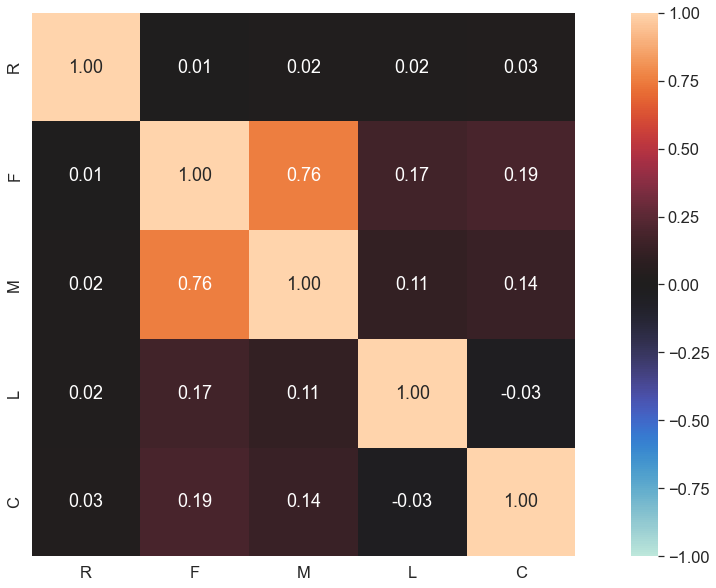

In [65]:
fig, ax = plt.subplots(figsize=(20, 10))
associations(ModelTrain, ax=ax);

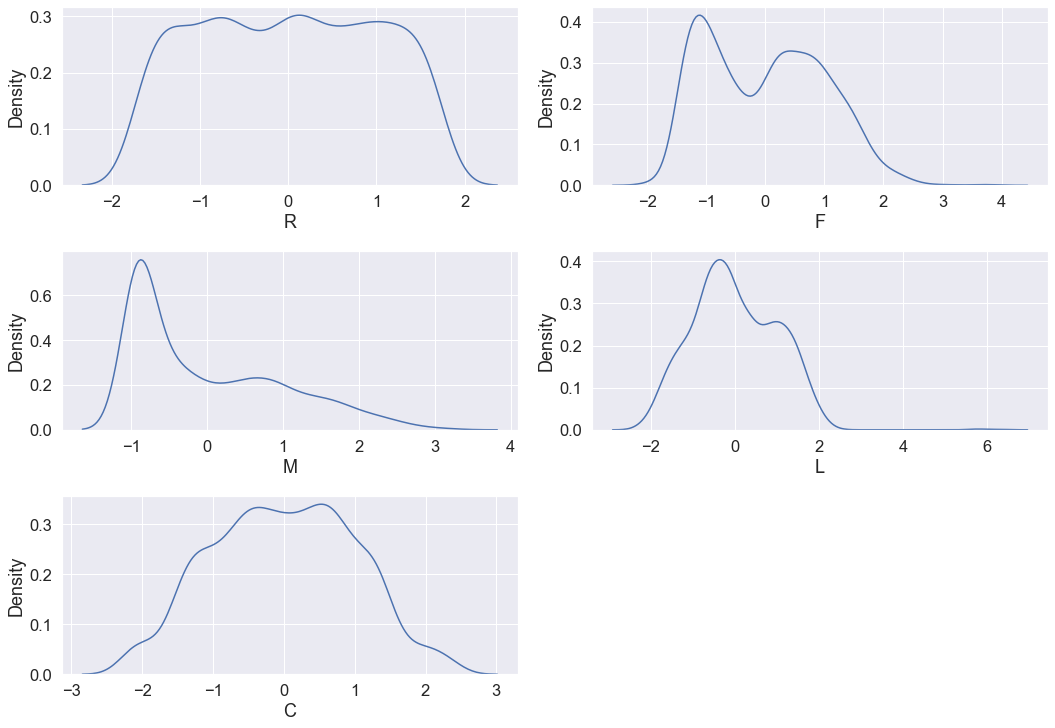

In [66]:
cols = ModelTrain.columns

plt.figure(figsize= (15, 20))
for i in range(len(cols)):
    plt.subplot(6, 2, i+1)
    sns.kdeplot(x = ModelTrain[cols[i]])
    plt.tight_layout()

### Handling Outliers

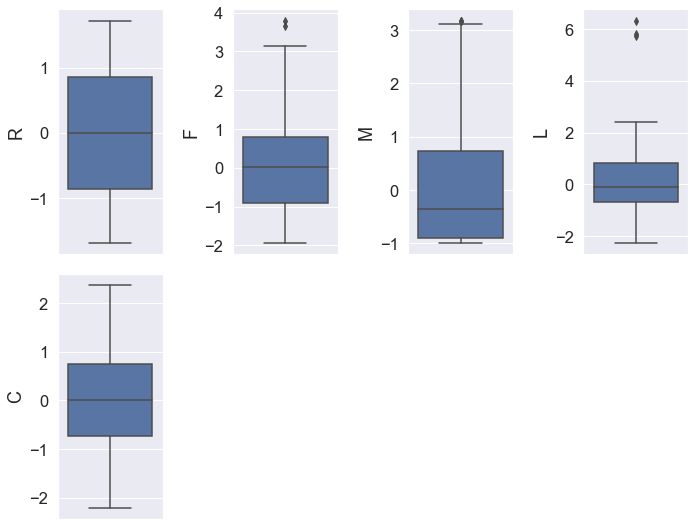

In [67]:

cols = ModelTrain.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = ModelTrain[cols[i]], orient='v')
    plt.tight_layout()

In [68]:
for col in cols:
    high_cut = ModelTrain[col].quantile(q=0.99)
    low_cut= ModelTrain[col].quantile(q=0.01)
    ModelTrain.loc[ModelTrain[col]>high_cut,col]=high_cut
    ModelTrain.loc[ModelTrain[col]<low_cut,col]=low_cut

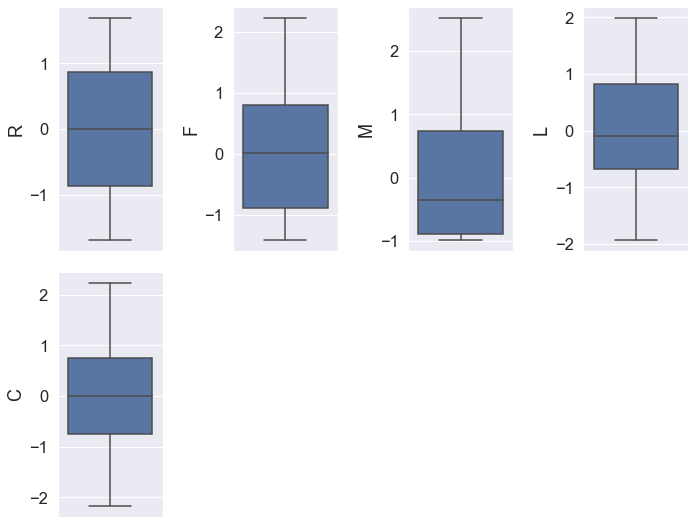

In [69]:
cols = ModelTrain.columns
plt.figure(figsize= (10,15))
for i in range(len(cols)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y = ModelTrain[cols[i]], orient='v')
    plt.tight_layout()

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [71]:
col_name = list(ModelTrain.columns)

mm = MinMaxScaler()
df_std_mm = mm.fit_transform(ModelTrain)
df_std_mm = pd.DataFrame(df_std_mm, columns=col_name)
df_std_mm.sample(10)

R         F         M         L         C
165   0.346939  0.500000  0.281590  0.553191  0.644300
749   0.877551  0.000000  0.001420  0.829787  0.531566
188   0.112245  0.392857  0.107903  0.765957  0.594304
1514  0.775510  0.571429  0.314245  0.744681  0.662925
129   0.979592  0.535714  0.211548  0.489362  0.144349
1962  0.744898  0.428571  0.417416  0.361702  0.804088
1556  0.224490  0.214286  0.067203  0.638298  0.880551
1253  0.367347  0.500000  0.165168  0.361702  0.356093
973   0.346939  0.428571  0.156176  0.765957  0.613910
2164  0.316327  0.642857  0.240416  0.787234  0.639398

In [72]:
df_std_mm.isna().sum()

R    0
F    0
M    0
L    0
C    0
dtype: int64

In [73]:
df_std_mm.dropna(inplace=True)

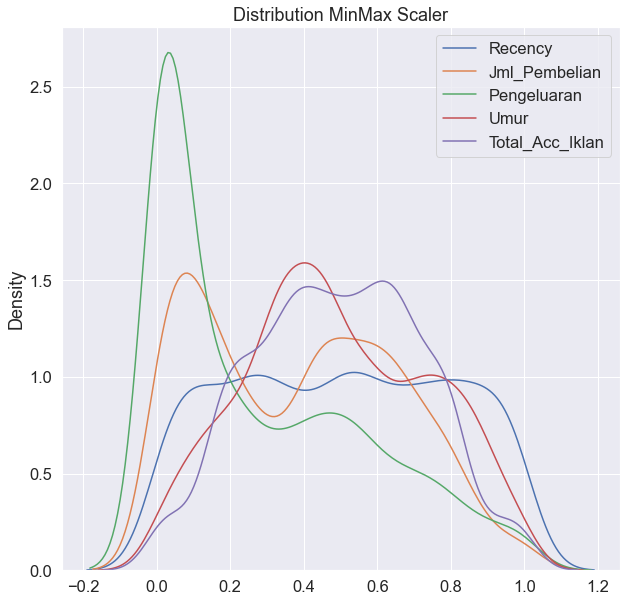

In [74]:
plt.figure(figsize=(10, 10))
plt.title('Distribution MinMax Scaler')
sns.kdeplot(df_std_mm['R'], label = 'Recency')
sns.kdeplot(df_std_mm['F'], label = 'Jml_Pembelian')
sns.kdeplot(df_std_mm['M'], label = 'Pengeluaran')
sns.kdeplot(df_std_mm['L'], label = 'Umur')
sns.kdeplot(df_std_mm['C'], label = 'Total_Acc_Iklan')
plt.xlabel(None)
plt.legend()
plt.show()

In [75]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_std_mm.describe()

R        F        M        L        C
count 2216.000 2216.000 2216.000 2216.000 2216.000
mean     0.500    0.388    0.280    0.492    0.493
std      0.295    0.271    0.283    0.248    0.227
min      0.000    0.000    0.000    0.000    0.000
25%      0.245    0.143    0.027    0.319    0.325
50%      0.500    0.393    0.181    0.468    0.494
75%      0.755    0.607    0.490    0.702    0.664
max      1.000    1.000    1.000    1.000    1.000

## Modeling dan Evaluasi

### Elbow Method

In [76]:
# from sklearn.cluster import KMeans
# inertia = []

# for i in range(2, 11):
#     kmeans = KMeans(n_clusters=i, random_state=0)
#     kmeans.fit(df_std_mm)
#     inertia.append(kmeans.inertia_)



# plt.figure(figsize=(10, 5))
# plt.title('Inertia Evaluation Score')
# sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
# sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
# plt.xlabel('n_clusters')
# plt.show()

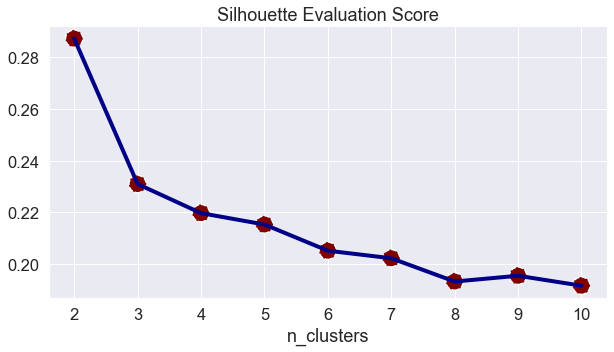

In [77]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_std_mm)
    preds = kmeans.predict(df_std_mm)
    score_euclidean = silhouette_score(df_std_mm, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Silhouette Evaluation Score')
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

In [79]:
X = df_std_mm.copy()

In [80]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [81]:

for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 0.5762578210629931
2 : 0.4730575367606059
3 : 0.43117516610359313
4 : 0.40148112067498753
5 : 0.3853343496797978
6 : 0.37005309488345467
7 : 0.3576828884779337
8 : 0.34531370823113083
9 : 0.3367228330558794


In [82]:
df_std_cluster = df_std_mm.copy()
df_cluster = ModelTrain.copy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(df_std_mm)
df_std_cluster['clusters'] = kmeans.labels_
df_cluster['clusters'] = kmeans.labels_

In [83]:

df_cluster.sample(10)

R      F      M      L      C  clusters
145  -1.555  0.016 -0.499  0.903 -0.112         1
1816 -0.346 -0.376 -0.644 -0.432 -1.080         1
1507  0.241 -1.419 -0.986 -0.349  0.387         2
1305  0.345 -0.897 -0.838 -0.265 -0.073         2
1953 -0.761  0.146  0.622  0.235  0.637         3
1428  1.347 -0.245 -0.493  0.903 -0.409         2
1567 -1.072  1.580  0.284 -1.517 -0.981         3
781   0.725 -0.767 -0.714  0.653  0.297         2
704  -0.139 -1.028 -0.928 -0.766 -0.486         1
1552 -0.795  1.319  0.683  0.986  0.460         3

### PCA

In [84]:
from sklearn.decomposition import PCA 

In [85]:
pca = PCA(n_components=2)

pca.fit(df_std_mm)
pcs = pca.transform(df_std_mm)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = df_cluster['clusters']
df_pca.sample(10)

PC 1   PC 2  clusters
1248 -0.257 -0.513         0
1122  0.012 -0.428         2
658   0.228 -0.371         0
980   0.424 -0.483         0
571  -0.431  0.278         2
1999  0.538  0.202         1
1961  0.106  0.485         1
556  -0.428 -0.070         1
1249  0.413 -0.055         0
173  -0.470  0.242         2

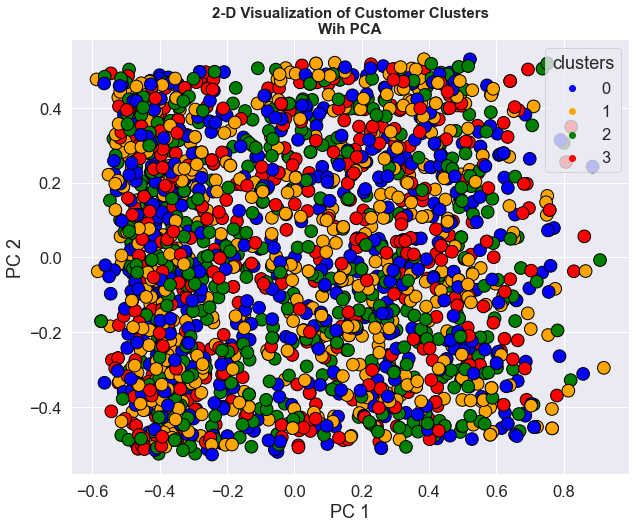

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWih PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);

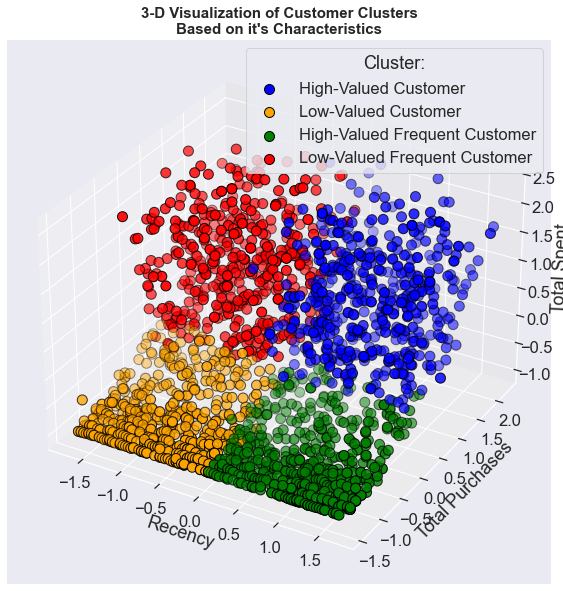

In [87]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-D Visualization of Customer Clusters\nBased on it's Characteristics", fontsize=15, weight='bold')
ax.scatter(df_cluster['R'][df_cluster.clusters == 0], df_cluster['F'][df_cluster.clusters == 0], df_cluster['M'][df_cluster.clusters == 0], c='blue', s=100, edgecolor='black', label='High-Valued Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 1], df_cluster['F'][df_cluster.clusters == 1], df_cluster['M'][df_cluster.clusters == 1], c='orange', s=100, edgecolor='black', label='Low-Valued Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 2], df_cluster['F'][df_cluster.clusters == 2], df_cluster['M'][df_cluster.clusters == 2], c='green', s=100, edgecolor='black', label='High-Valued Frequent Customer')
ax.scatter(df_cluster['R'][df_cluster.clusters == 3], df_cluster['F'][df_cluster.clusters == 3], df_cluster['M'][df_cluster.clusters == 3], c='red', s=100, edgecolor='black', label='Low-Valued Frequent Customer')
plt.xlabel('Recency')
plt.ylabel('Total Purchases')
ax.set_zlabel('Total Spent')
plt.legend(title='Cluster:')
plt.show()

## Insight

In [88]:

display(df_cluster.groupby('clusters').agg(['mean','median', 'max', 'min']))

R                           F                          M         \
           mean median    max    min   mean median   max    min   mean median   
clusters                                                                        
0         0.822  0.794  1.693 -0.139  0.857  0.798 2.232 -0.636  0.877  0.793   
1        -0.854 -0.864  0.103 -1.693 -0.817 -0.897 0.407 -1.419 -0.796 -0.893   
2         0.879  0.915  1.693 -0.139 -0.773 -0.897 0.537 -1.419 -0.786 -0.876   
3        -0.899 -0.864 -0.000 -1.693  0.895  0.798 2.232 -0.506  0.854  0.778   

                           L                          C                      
           max    min   mean median   max    min   mean median   max    min  
clusters                                                                     
0        2.520 -0.569  0.249  0.319 1.988 -1.934  0.218  0.284 2.224 -2.165  
1        0.362 -0.986 -0.271 -0.349 1.988 -1.934 -0.150 -0.187 2.224 -2.165  
2        0.322 -0.986 -0.076 -0.182 1.988 -1.934 -0.143 -0.172 2.224 -2.165  
3        2.520 -0.548  0.109  0.068 1.988 -1.934  0.097  0.138 2.224 -2.165

In [89]:
df_tc = df_cluster.groupby('clusters').agg({'R':'count'}).reset_index()
df_tc = df_tc.rename(columns={'R':'total_customers'})
df_tc['sum_customers'] = df_tc['total_customers'].sum()
df_tc['pct'] = round((df_tc['total_customers']/df_tc['sum_customers'])*100, 2)
df_tc

clusters  total_customers  sum_customers    pct
0         0              553           2216 24.950
1         1              592           2216 26.710
2         2              570           2216 25.720
3         3              501           2216 22.610

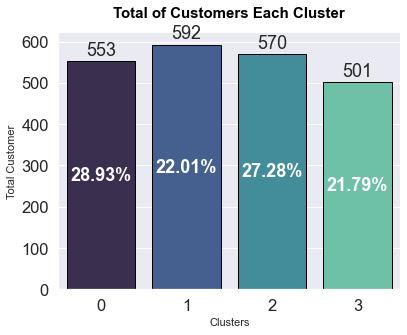

In [90]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.title("Total of Customers Each Cluster", fontsize=15, color='black', weight='bold', pad=15)
sns.barplot(x='clusters', y='total_customers', data=df_tc, edgecolor='black', palette='mako')

plt.xlabel('Clusters', fontsize=11)
plt.ylabel('Total Customer', fontsize=11)
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[0], ['28.93%', '22.01%', '27.28%', '21.79%'], label_type='center', color='white', weight='bold')

sns.despine()
plt.tight_layout()

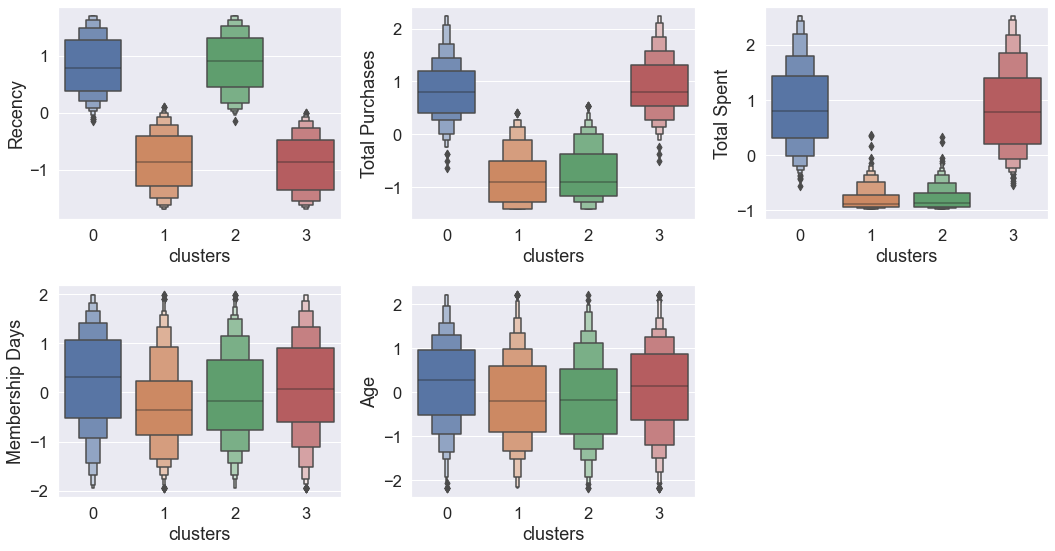

In [91]:
df_clust = df_cluster.copy()
df_clust.rename(columns={'R':'Recency','F':'Total Purchases','M':'Total Spent','L':'Membership Days','C':'Age'}, inplace=True)
clust = df_clust.columns.drop('clusters')

plt.figure(figsize= (15, 8))
for i in range(len(clust)):
    plt.subplot(2, 3, i+1)
    sns.boxenplot(x=df_cluster['clusters'], y=df_clust[clust[i]])
    plt.tight_layout()

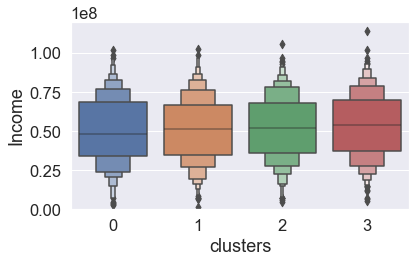

In [92]:
plt.figure(figsize= (6, 4))
sns.boxenplot(x=df_cluster['clusters'], y=df['Income'])
plt.ylim(0, 120000000)
plt.tight_layout()

In [93]:
df['Clusters'] = kmeans.labels_
df.head()

Education       Income  Kidhome  Teenhome  Recency  MntCoke  MntFruits  \
0        S1 58138000.000        0         0       58   635000      88000   
1        S1 46344000.000        1         1       38    11000       1000   
2        S1 71613000.000        0         0       26   426000      49000   
3        S1 26646000.000        1         0       26    11000       4000   
4        S3 58293000.000        1         0       94   173000      43000   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  Pengeluaran  Anak  \
0           546000           172000             88000  ...      1617000     0   
1             6000             2000              1000  ...        27000     2   
2           127000           111000             21000  ...       776000     0   
3            20000            10000              3000  ...        53000     1   
4           118000            46000             27000  ...       422000     1   

   OrangTua  TinggalBersama  To_Acc_Iklan  Jml_Pembelian  Dt_Collected  \
0         0         Sendiri             0             25    2023-03-26   
1         1         Sendiri             0              6    2023-03-26   
2         0         Sendiri             0             21    2023-03-26   
3         1         Sendiri             0              8    2023-03-26   
4         1         Bersama             0             19    2023-03-26   

   Dt_Days_Customer  KelompokUsia  Clusters  
0              4003        Manula         0  
1              3157        Manula         1  
2              3504  Lansia Akhir         3  
3              3097  Dewasa Akhir         1  
4              3353  Dewasa Akhir         2  

[5 rows x 35 columns]

In [94]:
df_age_clust = df.groupby(['Clusters', 'KelompokUsia']).agg({'Education':'count'}).reset_index()
df_age_clust = df_age_clust.rename(columns={'Education':'total_customers'})
df_age_clust['sum_customers'] = df_age_clust['total_customers'].sum()
df_age_clust['pct'] = round((df_age_clust['total_customers']/df_age_clust['sum_customers'])*100, 2)
df_age_clust

Clusters  KelompokUsia  total_customers  sum_customers   pct
0          0  Dewasa Akhir               85           2216 3.840
1          0   Dewasa Awal               22           2216 0.990
2          0  Lansia Akhir              115           2216 5.190
3          0   Lansia Awal              182           2216 8.210
4          0        Manula              116           2216 5.230
5          0      Usia Tua               33           2216 1.490
6          1  Dewasa Akhir               82           2216 3.700
7          1   Dewasa Awal               22           2216 0.990
8          1  Lansia Akhir              148           2216 6.680
9          1   Lansia Awal              195           2216 8.800
10         1        Manula              124           2216 5.600
11         1      Usia Tua               21           2216 0.950
12         2  Dewasa Akhir               84           2216 3.790
13         2   Dewasa Awal               26           2216 1.170
14         2  Lansia Akhir              129           2216 5.820
15         2   Lansia Awal              187           2216 8.440
16         2        Manula              115           2216 5.190
17         2      Usia Tua               29           2216 1.310
18         3  Dewasa Akhir               78           2216 3.520
19         3   Dewasa Awal               20           2216 0.900
20         3  Lansia Akhir              110           2216 4.960
21         3   Lansia Awal              169           2216 7.630
22         3        Manula               98           2216 4.420
23         3      Usia Tua               26           2216 1.170

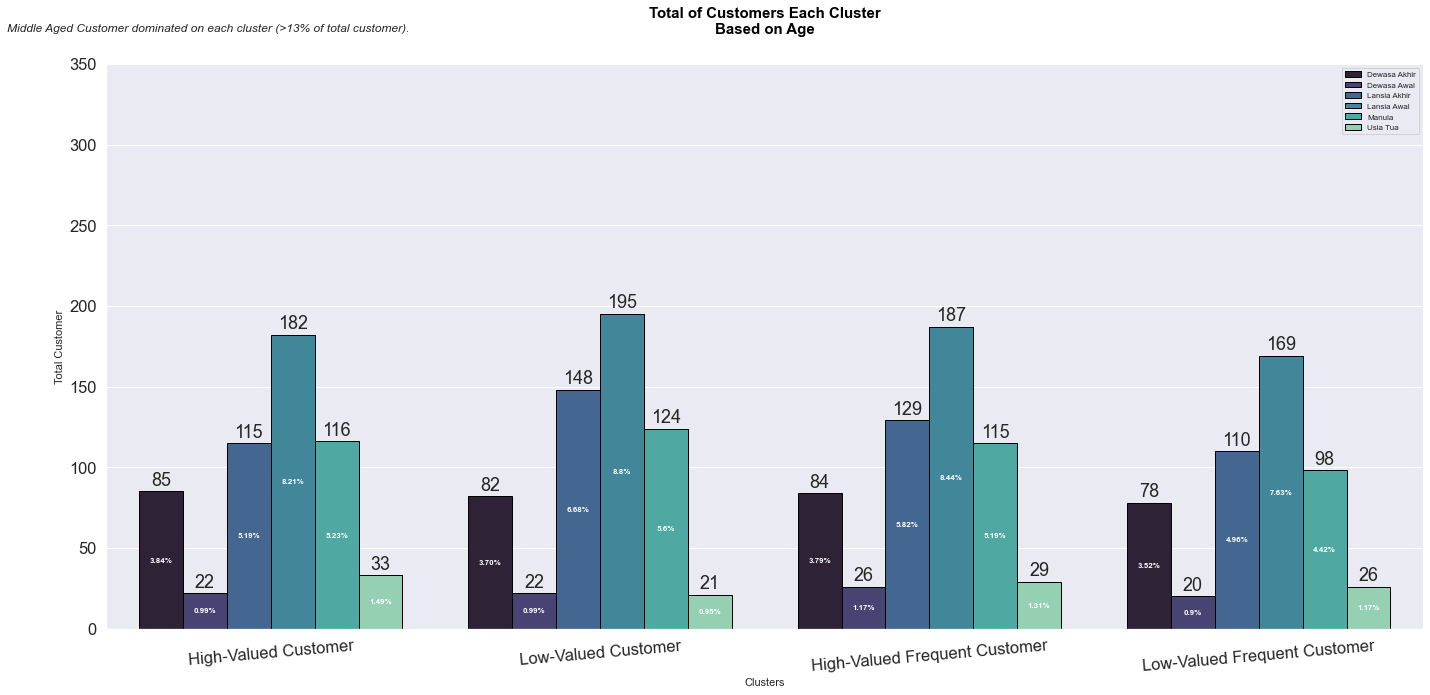

In [95]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Total of Customers Each Cluster\nBased on Age", fontsize=15, color='black', weight='bold', pad=30)
sns.barplot(x='Clusters', y='total_customers', data=df_age_clust, hue='KelompokUsia', edgecolor='black', palette='mako')
plt.text(x=-0.8, y=370, s="Middle Aged Customer dominated on each cluster (>13% of total customer).", fontsize=12, fontstyle='italic')
plt.xlabel('Clusters', fontsize=11)
plt.xticks(np.arange(4), ['High-Valued Customer', 'Low-Valued Customer', 'High-Valued Frequent Customer', 'Low-Valued Frequent Customer'], rotation=5)
plt.ylabel('Total Customer', fontsize=11)
plt.ylim(0, 350)
plt.legend(prop={'size':8}, loc='best')
plt.bar_label(ax.containers[0], padding=2)
plt.bar_label(ax.containers[1], padding=2)
plt.bar_label(ax.containers[2], padding=2)
plt.bar_label(ax.containers[3], padding=2)
plt.bar_label(ax.containers[4], padding=2)
plt.bar_label(ax.containers[5], padding=2)
plt.bar_label(ax.containers[0], ['3.84%', '3.70%', '3.79%', '3.52%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[1], ['0.99%', '0.99%', '1.17%', '0.9%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[2], ['5.19%', '6.68%', '5.82%', '4.96%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[3], ['8.21%', '8.8%', '8.44%', '7.63%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[4], ['5.23%', '5.6%', '5.19%', '4.42%'], label_type='center', color='white', weight='bold', fontsize=8)
plt.bar_label(ax.containers[5], ['1.49%', '0.95%', '1.31%', '1.17%'], label_type='center', color='white', weight='bold', fontsize=8)
sns.despine()
plt.tight_layout()

In [96]:
model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 2084
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Education_S1               2216 non-null   float64
 1   Education_S2               2216 non-null   float64
 2   Education_S3               2216 non-null   float64
 3   Education_SMA              2216 non-null   float64
 4   TinggalBersama_Sendiri     2216 non-null   float64
 5   KelompokUsia_Dewasa Awal   2216 non-null   float64
 6   KelompokUsia_Lansia Akhir  2216 non-null   float64
 7   KelompokUsia_Lansia Awal   2216 non-null   float64
 8   KelompokUsia_Manula        2216 non-null   float64
 9   KelompokUsia_Usia Tua      2216 non-null   float64
 10  Recency                    2216 non-null   float64
 11  NumWebVisitsMonth          2216 non-null   float64
 12  Complain                   2216 non-null   float64
 13  Umur                       2216 non-null   float

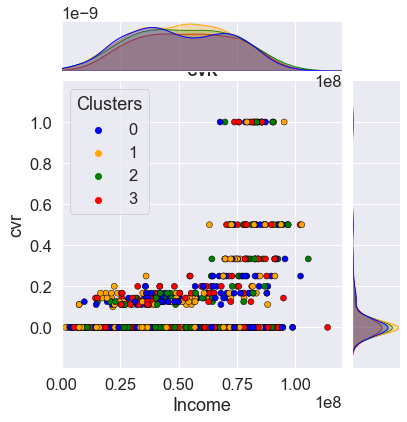

In [97]:
plot = sns.jointplot(x=df['Income'], y=df['cvr'], hue=df['Clusters'], edgecolor='black', palette=['blue','orange','green','red'])
plt.title('Income\nvs.\nCVR', fontsize=15, weight='bold')
plot.ax_marg_x.set_xlim(0, 120000000)
plt.show()

In [98]:
display(df.groupby('Clusters').describe(include='all'))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\1495869865.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\1495869865.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\1495869865.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16288\149586

Education                                                 ...  \
             count unique top freq first last mean  std  min  25%  ...   
Clusters                                                           ...   
0              553      5  S1  277   NaN  NaN  NaN  NaN  NaN  NaN  ...   
1              592      5  S1  304   NaN  NaN  NaN  NaN  NaN  NaN  ...   
2              570      5  S1  290   NaN  NaN  NaN  NaN  NaN  NaN  ...   
3              501      5  S1  245   NaN  NaN  NaN  NaN  NaN  NaN  ...   

         KelompokUsia                                                
                 freq first last mean  std  min  25%  50%  75%  max  
Clusters                                                             
0                 182   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1                 195   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2                 187   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3                 169   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[4 rows x 442 columns]

In [105]:
print('Total Spent of High-Valued Customer: '+str(df[df['Clusters']==0].Pengeluaran.sum()))
print('Total Spent of Low-Valued Customer: '+str(df[df['Clusters']==1].Pengeluaran.sum()))
print('Total Spent of High-Valued Frequent Customer: '+str(df[df['Clusters']==2].Pengeluaran.sum()))
print('Total Spent of Low-Valued Frequent Customer: '+str(df[df['Clusters']==3].Pengeluaran.sum()))
print('Total Spent: '+str(670167000+45617000+604441000+36763000))
print('Total Spent: '+str(317077000+352001000+356667000+319534000))

Total Spent of High-Valued Customer: 317077000
Total Spent of Low-Valued Customer: 352001000
Total Spent of High-Valued Frequent Customer: 356667000
Total Spent of Low-Valued Frequent Customer: 319534000
Total Spent: 1356988000
Total Spent: 1345279000


In [104]:
df['Clusters'].value_counts()

1    592
2    570
0    553
3    501
Name: Clusters, dtype: int64